# Lunar Lander Continuous Control with Proximal Policy Optimization and  Generalized Advantage Estimation


## Part 2/2:  Results & Evaluation

<h1><center>By: Ken K. Hong</center></h1>

# 5. Experimental Results and Analysis

Training curves displayed in Figures 4–9 illustrate the effects of hyperparameters on PPO learning behavior. Reward progression and standard deviation provide empirical performance measures aligned with theoretical expectations in the Lunar Lander environment. Baseline results in Figure 1 establish a reference for evaluating selected hyperparameters using a fixed random seed of 1. Random variations may affect outcomes. Without a fixed seed, averaging multiple training runs yields a reliable assessment of hyperparameter performance.

Figure 2 and Table 2 summarize baseline and variant model performance on the Colab v6e-1 TPU.

<br>

<center>

<h3>Table 2: Experimental results</h3>

| Experiment                  | Episodes Run | Training Time (s) | Time per Episode (s) | Average Standard Deviation |
|-----------------------------|--------------|-------------------|---------------------|----------------------------|
| **Baseline**                | 1107         | 377               | 0.34                | 106.56                     |
| **Trial 1 (GAE Lambda)**    | 2189         | 785               | 0.36                | 101.93                     |
| **Trial 2 (Epsilon Decay)** | 1002         | 449               | 0.45                | 108.75                     |
| **Trial 3 (Epsilon Clip)**  | 1125         | 462               | 0.41                | 105.94                     |
| **Trial 4 (Hidden Dim)**    | 1937         | 481               | 0.25                | 116.10                     |
| **Final Model**             | 919          | 361               | 0.39                | 109.96                     |

<br>

</center>


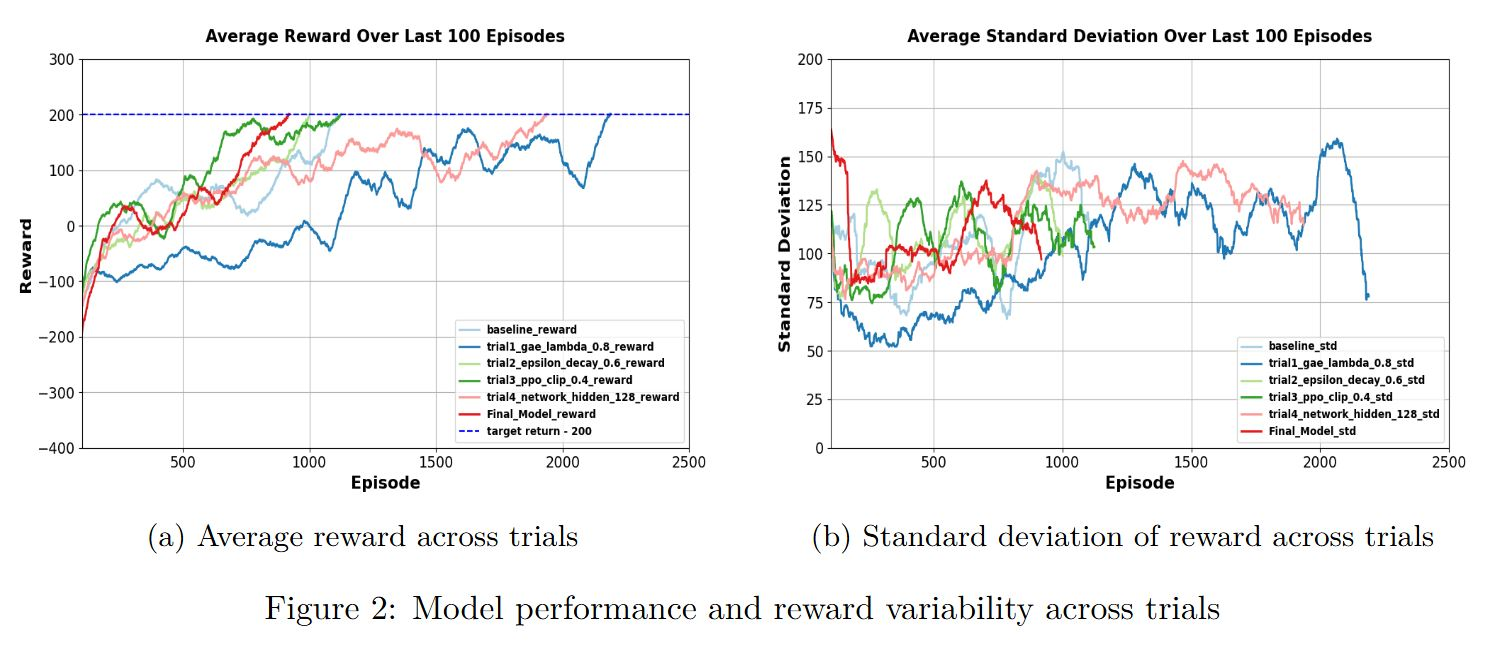

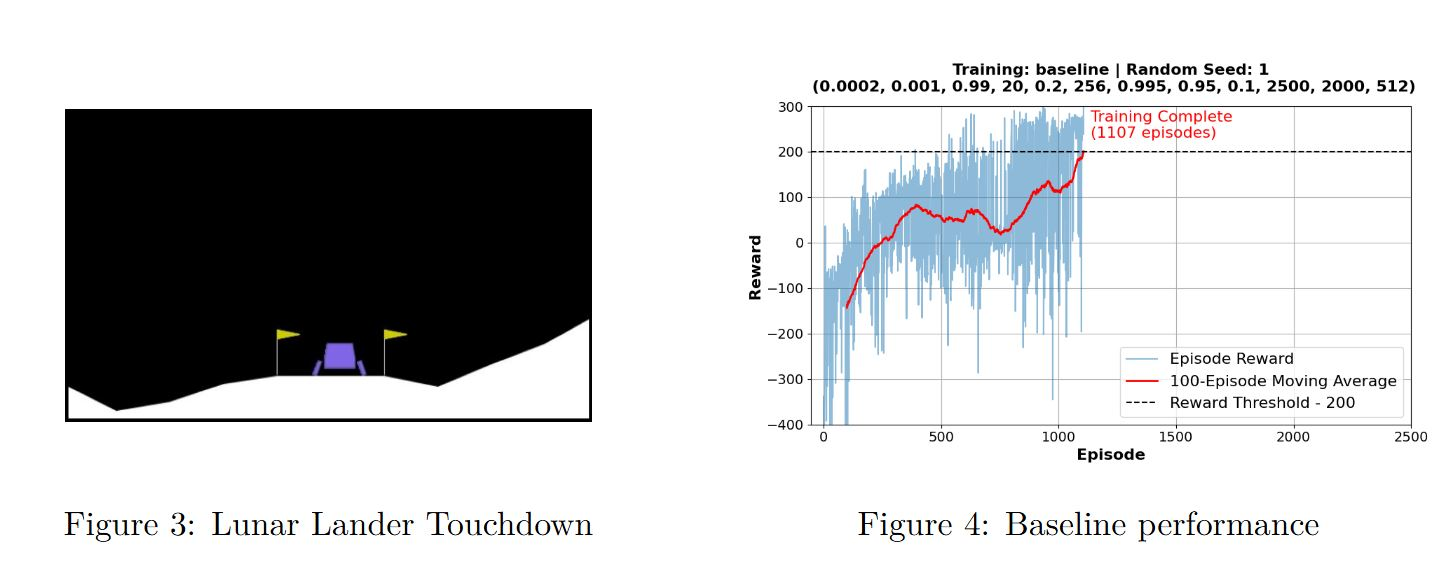

In [ ]:
from IPython.display import display, Image
display(Image("/content/Figure2.JPG", width=800, height=380))
display(Image("/content/Figure3.JPG", width=800, height=350))

## 5.1 Impact of Hyperparameters

**Effect of `gae_lambda` (Trial 1)**

Figure 5 illustrates the impact of the `gae_lambda` parameter on reward trajectory variance and smoothness. Lower values reduce variance but introduce bias and slow convergence. Higher values decrease bias and accelerate learning, sometimes at the expense of stability. This tradeoff aligns with theoretical distinctions between temporal-difference and Monte Carlo methods. Lowering `gae_lambda` from $0.95$ to $0.8$ extended training to 2189 episodes versus 1107 at baseline, indicating slower convergence. The standard deviation decreased from $106.56$ to $101.93$, indicating a more stable learning process.


**Effect of `epsilon_decay` (Trial 2)**

Figure 6 illustrates the effect of `epsilon_decay` on exploration-exploitation balance during training. Faster decay rates prompt early exploitation of the learned policy, occasionally resulting in suboptimal convergence. Slower decay rates encourage extended exploration, avoiding local optima at the expense of longer training. Lowering `epsilon_decay` from $0.995$ to $0.6$ reduced episodes from 1107 to 1002, demonstrating faster convergence and reduced unnecessary exploration time.




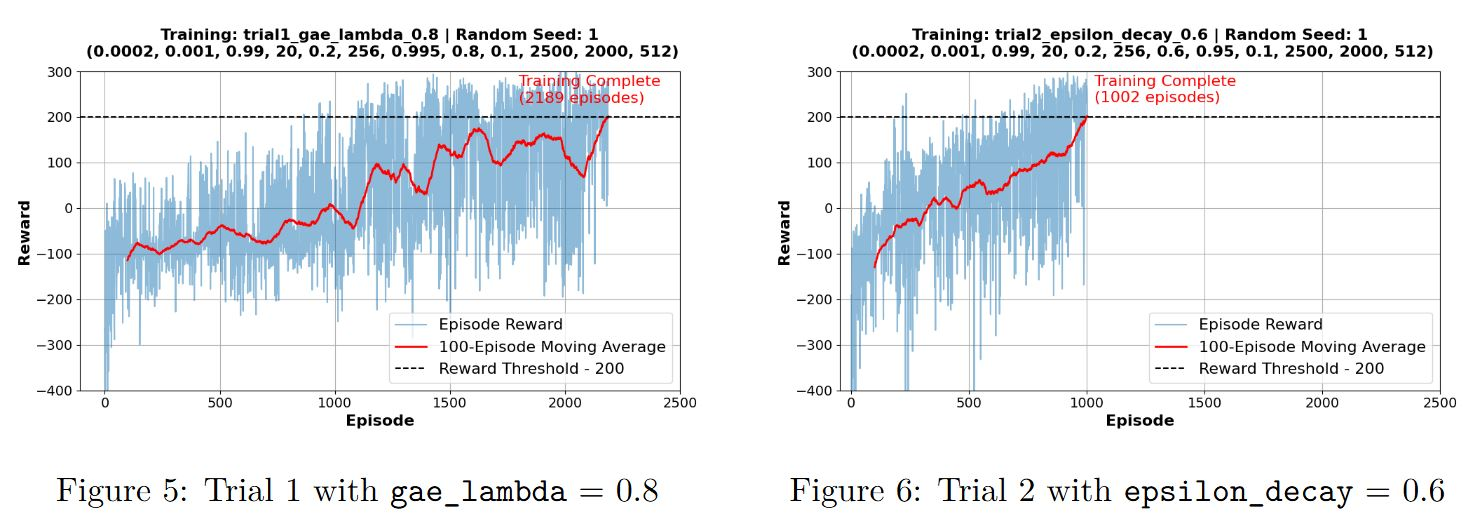

In [ ]:
display(Image("/content/Figure5.JPG", width=800, height=350))


**Effect of `eps_clip` (Trial 3)**

Figure 7 illustrates the effect of the `eps_clip` parameter on policy update magnitude. Smaller values restrict updates, promoting stability but slowing learning. Larger values allow broader updates, sometimes accelerating learning at the cost of increased instability. Trial 3 used `eps_clip` = $0.4$ versus $0.2$ in the baseline. Similar performance and variance in both cases likely resulted from gradient clipping that limited the global gradient norm to $0.5$.



**Effect of `hidden_dim` (Trial 4)**

Figure 8 illustrates how hidden layer size influences model capacity and representational power. Larger dimensions improve performance in complex scenarios but require more computation and risk overfitting. Smaller dimensions enable faster training with reduced expressiveness. Trial 4 employed 128 hidden units instead of 256 in the baseline. Average episode time dropped from $0.34$ to $0.25$ seconds, while episode count rose from 1107 to 1937, reflecting increased bias from lower model complexity.



**Sensitivity to Additional Hyperparameters**

Learning rate, discount factor and batch size values were chosen from literature and experience. Effects were less pronounced than those of primary parameters, yet certain combinations influenced training efficiency and performance. For example, lower learning rates increased convergence time.





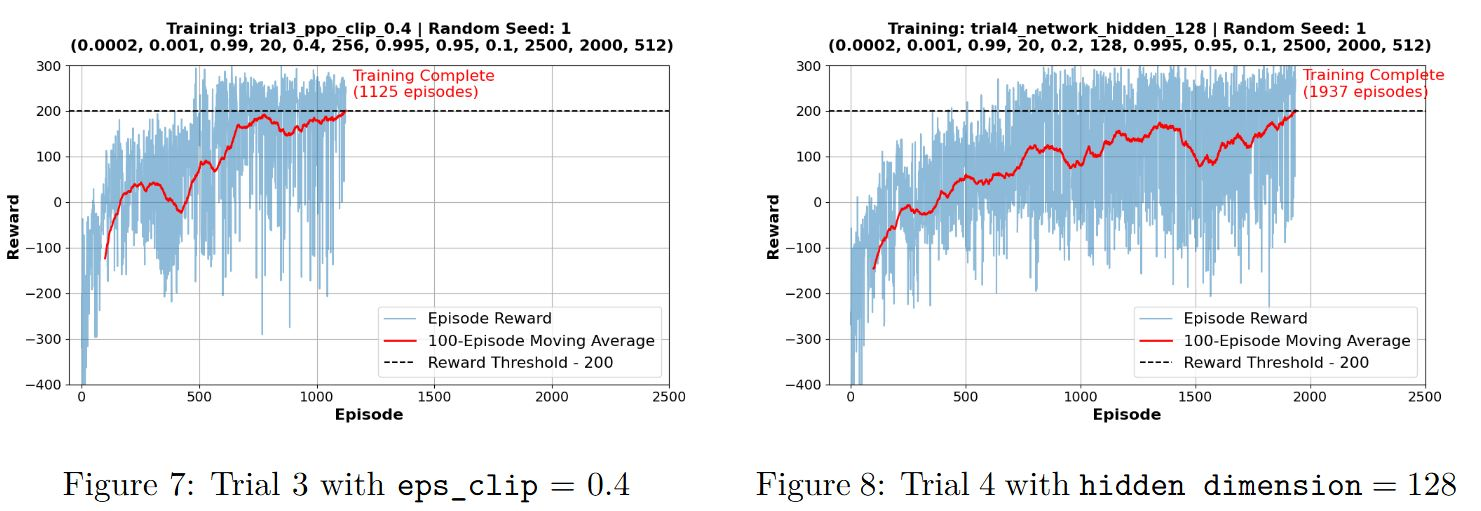

In [ ]:
display(Image("/content/Figure7.JPG", width=800, height=350))

## 5.2 Final Model and Evaluation

The final model configuration was selected based on experimental results to balance convergence speed, training stability, and performance. The hyperparameters were `gae_lambda` = $0.94$, `epsilon_decay` = $0.8$, `eps_clip` = $0.25$, and hidden layer size of 256.

This configuration resulted in faster convergence and strong returns, with only a minimal increase in the average standard deviation. Figure 9 presents the overall performance metrics, and Figure 10shows the reward progression over the last 100 episodes.

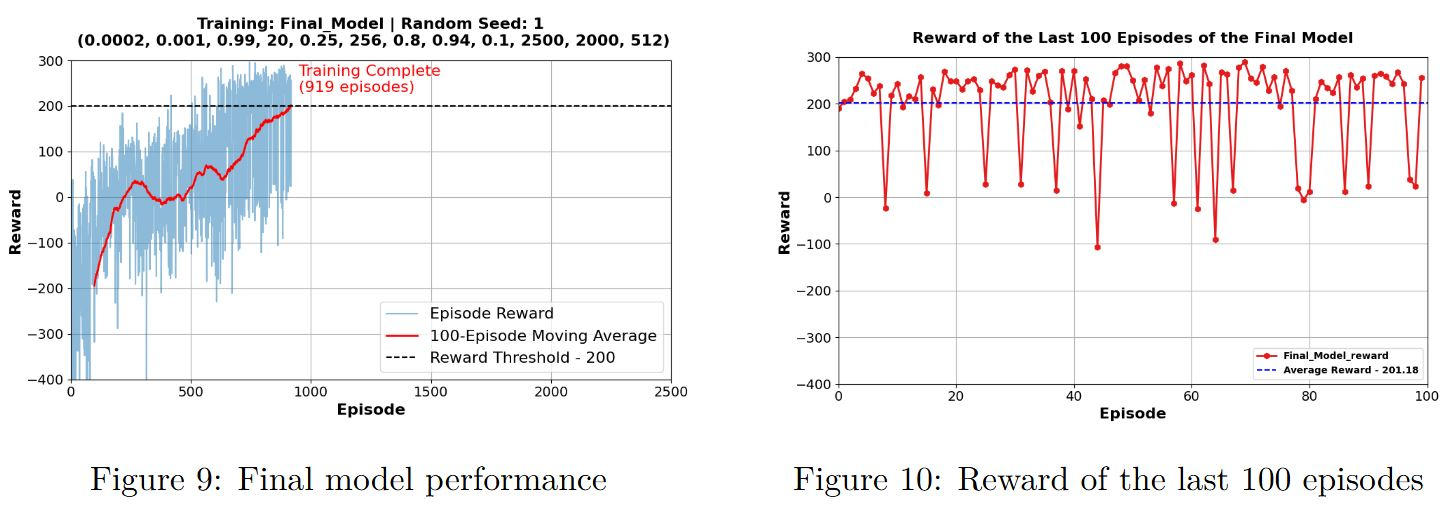

In [ ]:
display(Image("/content/Figure9.JPG", width=800, height=350))

In [ ]:
# !apt-get install -y swig
# !pip install "gymnasium[box2d]"

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
current_directory = os.getcwd()
files = os.listdir(current_directory)
# for file in files:
#     print(file)

In [ ]:
def load_files(files, suffix, col_name, index_len=2501):
    df = pd.DataFrame({'Idx': range(index_len)}, index=range(index_len))
    selected_files = [f for f in files if f.endswith(suffix)]
    for f in selected_files:
        col_data = pd.read_csv(f)
        df.loc[df.index[:len(col_data)], f[:-4]] = col_data[col_name].values
    return df

df_reward = load_files(files, '_reward.csv', 'reward')
df_std = load_files(files, '_std.csv', 'std')

columns_reward = [
    'Idx','baseline_reward','trial1_gae_lambda_0.8_reward','trial2_epsilon_decay_0.6_reward',
    'trial3_ppo_clip_0.4_reward','trial4_network_hidden_128_reward','Final_Model_reward']
columns_std = [
    'Idx','baseline_std','trial1_gae_lambda_0.8_std','trial2_epsilon_decay_0.6_std',
    'trial3_ppo_clip_0.4_std','trial4_network_hidden_128_std','Final_Model_std']

In [ ]:
df_reward = df_reward[columns_reward]
df_moving_avg = df_reward.copy()
cols_to_avg = df_reward.columns.drop('Idx')
df_moving_avg[cols_to_avg] = df_reward[cols_to_avg].rolling(window=100).mean().shift(1)
df_moving_avg = df_moving_avg.iloc[100:]
df_moving_avg
#df_moving_avg.head()

df_std = df_std[columns_std]
df_std = df_std.iloc[100:]
#df_std.head()

df_std.describe()

Idx  baseline_std  trial1_gae_lambda_0.8_std  \
count  2401.000000   1007.000000                2089.000000   
mean   1300.000000    106.560541                 101.932203   
std     693.253321     22.418473                  28.639921   
min     100.000000     66.288570                  51.993352   
25%     700.000000     91.323216                  75.667405   
50%    1300.000000    105.529833                 107.314258   
75%    1900.000000    118.893868                 125.700447   
max    2500.000000    152.421855                 159.068724   

       trial2_epsilon_decay_0.6_std  trial3_ppo_clip_0.4_std  \
count                    902.000000              1025.000000   
mean                     108.753284               105.944751   
std                       15.844786                16.574741   
min                       76.885560                74.387840   
25%                       97.347674                90.985144   
50%                      105.287815               109.732525   
75%                      121.568538               119.719398   
max                      141.569345               137.038737   

       trial4_network_hidden_128_std  Final_Model_std  
count                    1837.000000       819.000000  
mean                      116.103541       109.957148  
std                        19.429395        17.937087  
min                        76.434825        83.479061  
25%                        96.629051        96.367200  
50%                       121.975876       103.280124  
75%                       132.507541       122.338933  
max                       147.586511       163.978780

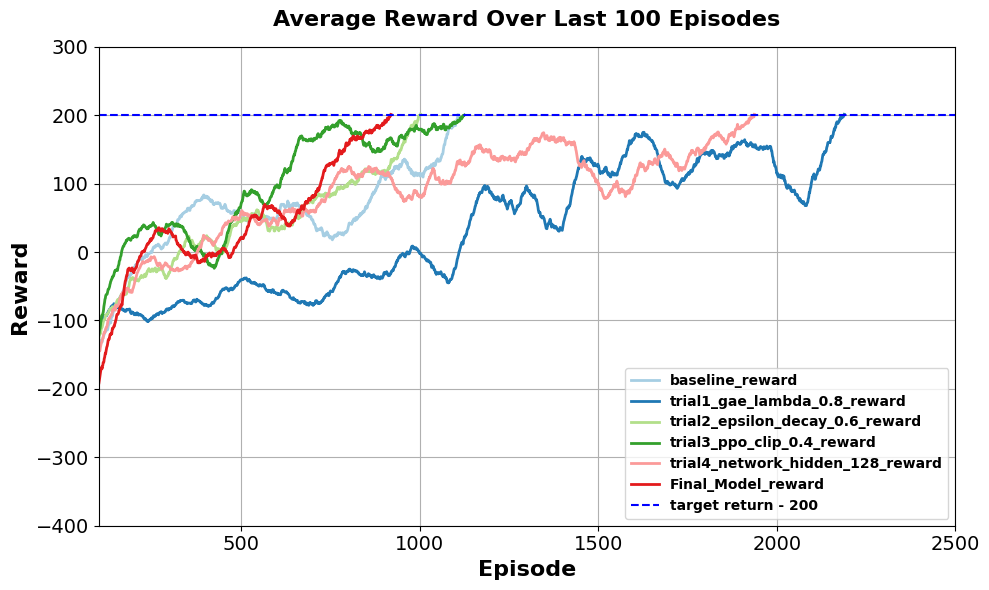

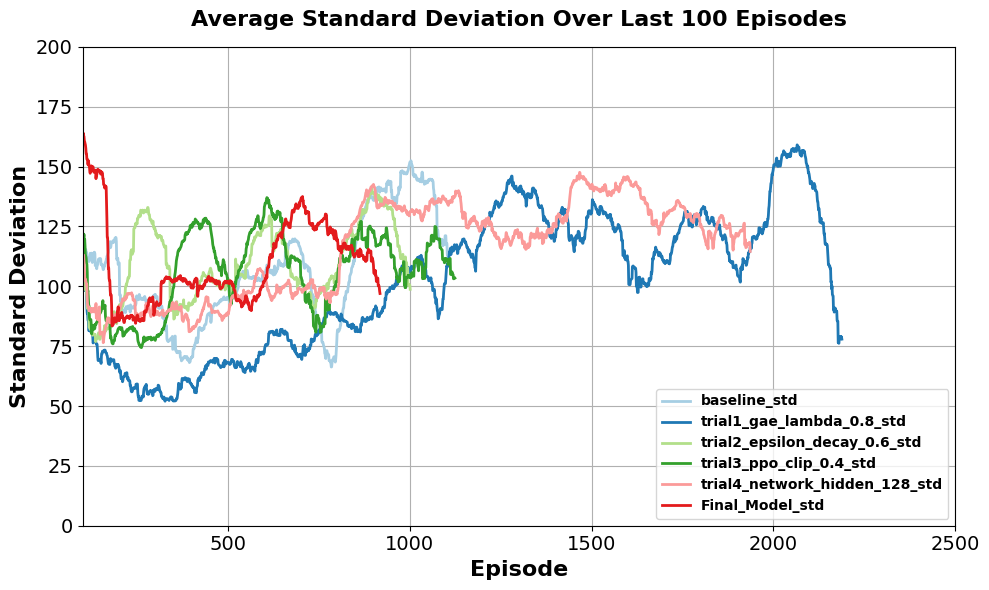

In [ ]:
def plot_lines(df, y_label, title, ylim, xlim=(100, 2500), palette="Paired", marker=None, hline_y=None, hline_label=None):
    x = df['Idx']
    cols = df.columns.drop('Idx')
    colors = sns.color_palette(palette, len(cols))
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(cols):
        plt.plot(x, df[col], label=col, linestyle='-', lw=2, color=colors[i % len(colors)], marker=marker)

    if hline_y is not None:
        plt.axhline(y=hline_y, color='b', linestyle='--', label=hline_label)

    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Episode', fontsize=16, fontweight='bold')
    plt.ylabel(y_label, fontsize=16, fontweight='bold')
    plt.xticks(rotation=0, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.legend(loc='lower right', fontsize=20, title='', title_fontsize=20, prop={'weight': 'bold'})
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_lines(df_moving_avg, "Reward", title="Average Reward Over Last 100 Episodes", ylim=(-400, 300), hline_y= 200, hline_label=f'target return - 200')
plot_lines(df_std, "Standard Deviation", title="Average Standard Deviation Over Last 100 Episodes", ylim=(0, 200))

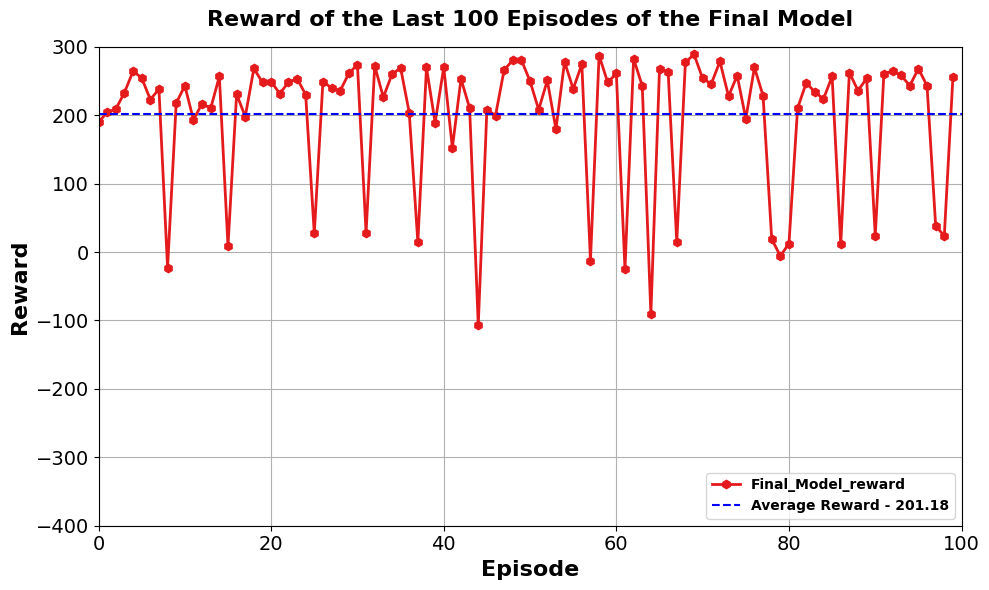



Final Model Performance Over the Last 100 Episodes:

Average Reward:                           201.18
Episodes with Reward ≥ 200:              75
Episodes with Reward < 200:              25




In [ ]:
final_model_idx = df_reward['Final_Model_reward'].notnull().sum()
df_final_model = df_reward.iloc[final_model_idx - 100: final_model_idx]['Final_Model_reward'].reset_index(drop=True)
df_final_model = df_final_model.reset_index().rename(columns={'index': 'Idx'})
avg_return = df_final_model.Final_Model_reward.mean()
plot_lines(df_final_model, "Reward", title="Reward of the Last 100 Episodes of the Final Model", xlim=(0, 100),
                    ylim=(-400, 300), palette='Set1', marker='h', hline_y= avg_return, hline_label=f'Average Reward - {avg_return:.2f}')

values = df_final_model['Final_Model_reward']
count_ge_200 = (values >= 200).sum()
count_lt_200 = len(df_final_model['Final_Model_reward']) - count_ge_200
print("\n\nFinal Model Performance Over the Last 100 Episodes:\n")
print(f"Average Reward:                           {avg_return:.2f}")
print(f"Episodes with Reward ≥ 200:              {count_ge_200}")
print(f"Episodes with Reward < 200:              {count_lt_200}\n\n")

In [ ]:
import torch
import torch.nn as nn
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
class PolicyNet(nn.Module):
    """ The policy network - the Actor """
    def __init__(self, state_dim, action_dim, hidden_dim=256, dropout_prob=0.2):
        super(PolicyNet, self).__init__()
        # 4-layer MLP with dropout and ReLU non-linearities added
        self.network = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
            nn.Linear(hidden_dim, action_dim),
            nn.Tanh() # Tanh return (-1,1 )
        )
        self.log_dev = nn.Parameter(torch.zeros(action_dim))

    def forward(self, state):
        action_val = self.network(state)
        return action_val

class EvaluationAgent:
    def __init__(self, state_dim, action_dim, model_path):
        #self.device = torch.device("cpu")
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.actor = PolicyNet(state_dim, action_dim).to(self.device)

        if os.path.exists(model_path):
            checkpoint = torch.load(model_path, map_location=self.device)
            self.actor.load_state_dict(checkpoint['actor_state_dict'])
            self.actor.eval()
            print(f"Model loaded successfully from {model_path}")
        else:
            print(f"Error: Model file not found at '{model_path}'")

    def select_action(self, state):
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state).to(self.device)
            action = self.actor(state_tensor)
        return action.cpu().numpy()

In [ ]:
Model_path = 'Final_Model.pth'
env = gym.make("LunarLanderContinuous-v3", render_mode='rgb_array') #  render_mode='human' for pop-up
agent = EvaluationAgent(env.observation_space.shape[0], env.action_space.shape[0], Model_path)

evaluating, target_reward = True, 280

while evaluating:
    state, _ = env.reset()
    done, total_reward, frames = False, 0, []

    while not done:
        frames.append(env.render())
        action = agent.select_action(state)
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward

    if total_reward >= target_reward:
        print(f"Evaluation Finished: Total Reward ={total_reward:.2f}")
        evaluating = False

env.close()

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
im = ax.imshow(frames[0])

def animate(i):
    im.set_array(frames[i])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True)
anim.save("lunar_lander_eval.mp4", writer='ffmpeg', fps=20, dpi=150, bitrate=1800)
plt.close(fig)

HTML(anim.to_jshtml())

Model loaded successfully from Final_Model.pth
Evaluation Finished: Total Reward =282.31


# 6. Discussion and Conclusion

## 6.1 Main Takeaways

**Effect of GAE Lambda**  
Adjusting the `gae_lambda` parameter revealed a clear trade-off between bias and variance. Lower values reduced reward variance but slowed convergence, whereas higher values accelerated learning at the cost of occasional instability. This finding is consistent with existing theoretical perspectives on temporal-difference versus Monte Carlo methods.

**Exploration and Stability**  
Modifications to `epsilon_decay` and `eps_clip` influenced the exploration-exploitation balance and stability of policy updates. Faster epsilon decay promoted quicker convergence but risked suboptimal policies. Larger clipping thresholds enabled faster updates, but their effect was tied to gradient clipping.

**Model Capacity and Efficiency**  
Reducing the hidden layer size improved training speed per episode but introduced higher bias, requiring more episodes to achieve similar performance. This emphasizes the trade-off between model complexity and training efficiency.


## 6.2 Future Improvements

**Exploring Alternative Models**  
Future work may explore alternative reinforcement learning agents like A2C or DDPG, as Proximal Policy Optimization with GAE may be too complex for this task. Investigating function approximations such as linear or spline regression could improve training efficiency and reduce computational costs, though possibly at the expense of representation power. These methods could study learning efficiency, stability, and resource use, offering more efficient solutions.

**Improved Reliability and Generalizability**  
Running experiments with multiple random seeds and averaging results helps reduce randomness and yields a more stable evaluation of model performance. Results obtained using a fixed random seed may not fully represent the range of possible outcomes, potentially leading to biased or overly optimistic estimates. Conducting multiple trials with varied seeds provides a more reliable and generalizable measure of true model performance.

**Data Efficiency**  
Improving data efficiency through enhanced rollout buffer design and fixed training parameters during updates could be investigated in future work. Current experiments require many episodes, resulting in resource-intensive training. Techniques such as experience replay and improved sample reuse may reduce the interactions needed to achieve high performance, accelerating training and increasing practicality in real-world settings with limited or costly data.

**Enhanced Agents with Direct Preference Optimization**  
To improve performance beyond standard PPO, future research could investigate Direct Preference Optimization (DPO) frameworks. DPO, as proposed by [Rafailov et al., 2023](https://arxiv.org/abs/2305.18290), is an alternative to reinforcement learning with human feedback (RLHF) that directly fine-tunes policies from preference data using a classification-based objective. Although originally developed for language models, the core idea of optimizing policies based on relative preferences could be adapted to the lunar landing domain. For instance, human or expert preferences over landing trajectories and safety margins could guide policy learning. Leveraging preference-based optimization may improve sample efficiency, increase robustness to rare failure modes, and lead to safer and more reliable lunar landing agents.



## 6.3 Scaling to Real-World Applications

Although the environment is considered "solved" with average returns exceeding 200 over 100 consecutive episodes, the final model achieved returns above 200 in only 75 percent of episodes. The remaining 25 percent showed fluctuations, including 17 episodes with near-zero rewards. These inconsistencies highlight challenges in robustness and reliability, which are critical for real-world applications where failures can result in safety risks or inefficiencies.

Variability can arise from environmental randomness, limited training data, and insufficient generalization, while real-world applications present unpredictable behavior, sensor noise, and evolving conditions. Overcoming these challenges demands domain randomization, ensemble methods, safety constraints during training, and thorough validation through realistic simulations and staged real-world trials. Although current results demonstrate promising control in simulation, further development is essential to ensure safe and reliable performance in complex real-world scenarios.


# References

- Emma Brunskill, Chethan Bhateja, Aishwarya Mandyam, HyunJi (Alex) Nam, Hengyuan Hu, Lansong (Ryan) Li, Shiyu Zhao, and Keenon Werling. *Cs234: Reinforcement learning*, 2025.  
URL: [https://web.stanford.edu/class/cs234/](https://web.stanford.edu/class/cs234/) Accessed: 2025-06-18.

- Logan Engstrom, Andrew Ilyas, Shibani Santurkar, Dimitris Tsipras, Firdaus Janoos, Larry Rudolph, and Aleksander Madry. *Implementation matters in deep policy gradients: A case study on PPO and TRPO*. arXiv preprint arXiv:2005.12729, 2020.  
URL: [https://arxiv.org/abs/2005.12729](https://arxiv.org/abs/2005.12729)

- Farama Foundation. *Lunar Lander - Gymnasium Documentation*, 2025.  
URL: [https://gymnasium.farama.org/environments/box2d/lunar_lander/](https://gymnasium.farama.org/environments/box2d/lunar_lander/) Accessed: 2025-06-18.

- OpenAI. *Proximal Policy Optimization*, 2017.  
URL: [https://spinningup.openai.com/en/latest/algorithms/ppo.html](https://spinningup.openai.com/en/latest/algorithms/ppo.html) Accessed: 2025-06-18.

- Long Ouyang, Jeff Wu, Xu Jiang, Diogo Almeida, Carroll L. Wainwright, Pamela Mishkin, Chong Zhang, Sandhini Agarwal, Katarina Slama, Alex Ray, John Schulman, Jacob Hilton, Fraser Kelton, Luke Miller, Maddie Simens, Amanda Askell, Peter Welinder, Paul Christiano, Jan Leike, and Ryan Lowe. *Training language models to follow instructions with human feedback*, 2022.  
URL: [https://arxiv.org/abs/2203.02155](https://arxiv.org/abs/2203.02155)

- Rafael Rafailov, Aditi Sharma, Eric Mitchell, Stefano Ermon, Christopher D Manning, and Chelsea Finn. *Direct preference optimization: Your language model is secretly a reward model*. arXiv preprint arXiv:2305.18290, 2023.  
URL: [https://arxiv.org/abs/2305.18290](https://arxiv.org/abs/2305.18290)

- John Schulman, Philipp Moritz, Sergey Levine, Michael I Jordan, and Pieter Abbeel. *High-dimensional continuous control using generalized advantage estimation*. arXiv preprint arXiv:1506.02438, 2015.  
URL: [https://arxiv.org/abs/1506.02438](https://arxiv.org/abs/1506.02438)

- John Schulman, Filip Wolski, Prafulla Dhariwal, Alec Radford, and Oleg Klimov. *Proximal policy optimization algorithms*. arXiv preprint arXiv:1707.06347, 2017.  
URL: [https://arxiv.org/abs/1707.06347](https://arxiv.org/abs/1707.06347)

- Richard S. Sutton and Andrew G. Barto. *Reinforcement Learning: An Introduction*. The MIT Press, 2nd edition, 2018.  
URL: [http://incompleteideas.net/book/the-book-2nd.html](http://incompleteideas.net/book/the-book-2nd.html)

- Unsloth. *Reinforcement learning guide*, 2025.  
URL: [https://docs.unsloth.ai/basics/reinforcement-learning-guide](https://docs.unsloth.ai/basics/reinforcement-learning-guide) Accessed: 2025-06-18.
